## Imports

In [222]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from svmsource import *
%matplotlib inline

## Mise en oeuvre 

### En vous basant sur la documentation à l’adresse suivante :
http://scikit-learn.org/stable/modules/svm.html
écrivez un code qui va classifier la classe 1 contre la classe 2 du dataset iris en utilisant les deux
premières variables et un noyau linéaire. En laissant la moitié des données de côté, évaluez la
performance en généralisation du modèle. Le dataset iris s’obtient avec les lignes suivantes :

In [223]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris = datasets.load_iris()
X = iris.data
X = scaler.fit_transform(X)
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]

In [224]:
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [226]:
pred = clf.predict(X_test)

In [227]:
from sklearn.metrics import accuracy_score
accuracy_score(pred, y_test)

0.68

### Comparez le résultat avec un SVM basé sur noyau polynomial.

In [228]:
clf = SVC(kernel = 'poly')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.56

Le résultat est moins bon, étant donné que l'ajout de complexité dans la frontière de décision n'est pas toujours otpimal.

### Montrez que le problème primal résolu par le SVM peut se réécrire de la façon suivante :

<img src='screen1.png'>

### Expliquez la phrase : "un SVM minimise l’erreur de classification à l’aide d’un majorant convexe de la fonction qui vaut 1 quand la marge est négative et 0 sinon". La fonction x → [1 − x]+ = max(0, 1 − x) est appelée Hinge (charnière en français).

**Réponse :**
Le classifieur SVM s'appuie sur des vecteurs support pour déterminer une frontière de décision. Si la marge est négative, cela signifie que la classification d'un élément est mauvaise. Minimiser cette fonction revient à minimiser l'erreur de classification.

Lancez le script svm_gui.py disponible à l’adresse : http://scikit-learn.org/stable/auto_
examples/applications/svm_gui.html Cette application permet en temps réel d’évaluer l’impact
du choix du noyau et du paramètre de régularisation C.

<img src='1.png'>

Générez un jeu de données très déséquilibré avec beaucoup plus de points dans une classe que dans
l’autre (au moins 90% vs 10%).

A l’aide d’un noyau linéaire et en diminuant le paramètre C qu’observez vous ?
Ce phénomène peut être corrigé en pratique en pondérant d’avantage les erreurs sur la classe la
moins présente (paramètre class_weight de SVC) ou par une technique de re-calibration (utilisée
avec SVC(..., probability=True)).

<img src='2.png'>

**Réponse :** Les erreurs sur la classe minoritaire deviennent très importantes, et les bornes H1 et H-1 s'éloignent progressivement en s'appuyant d'un côté sur les vecteurs support. Les frontières deviennent tellement larges que la classe minoritaire disparait de la frontière de classification.

## Classification de visages

L’exemple suivant est un problème de classification de visages. La base de données à utiliser est
disponible sur la site pédagogique. Vous pouvez choisir deux personnes, par exemple Tony Blair et Colin
Powell, pour accélérer le calcul. Aussi, vous pouvez utilisez seulement grayscale (et non le couleur) pour
réduire le nombre de variables.

### Utilisez les features centrées et réduites. (Pourquoi ?)

In [229]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [230]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4, color=False)

In [231]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [232]:
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [237]:
index = []

for name in lfw_people.target:
    if name == 1 :
        index.append(True)
    elif name == 5 :
        index.append(True)
    else :
        index.append(False)

In [238]:
X = np.array(lfw_people.data)[np.array(index)].tolist()
y_images = np.array(lfw_people.images)[np.array(index)].tolist()
y_target = np.array(lfw_people.target)[np.array(index)].tolist()

**Réponse :** On utilise les données centrées réduites pour éviter une sensibilité accrue envers certaines features qui troubleraient la frontière de décision.

In [239]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [240]:
X

array([[ 2.69738652,  2.78304516,  2.81230399, ..., -0.42508892,
        -0.28811596, -0.20318312],
       [-1.42650775, -1.72916304, -2.03761066, ..., -1.22189332,
        -0.96007924, -0.66314721],
       [-0.58087769, -0.50799704, -0.59056531, ..., -0.73668842,
        -0.36326972,  0.10490611],
       ...,
       [-0.92839693, -1.02699262, -1.11916637, ..., -0.43844319,
        -0.24832866,  0.14829888],
       [-0.22177458, -0.3980921 , -0.69628557, ..., -1.00377368,
        -0.80535083, -0.74993285],
       [-1.19482828, -1.37502491, -1.52883213, ..., -1.12396205,
        -0.99544574, -0.53730795]])

### Montrez l’influence du paramètre de régularisation. On pourra par exemple afficher l’erreur de prédiction en fonction de C sur une échelle logarithmique entre 1e5 et 1e-5.

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.25, random_state=42)
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [242]:
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.974025974025974

In [243]:
i = 0.00005
pred = []
ind = []

while i < 50001 :
    clf = SVC(kernel = 'linear', C = i)
    clf.fit(X_train, y_train)
    err = 1 - accuracy_score(clf.predict(X_test), y_test)
    pred.append(err)
    ind.append(i)
    i = i * 10

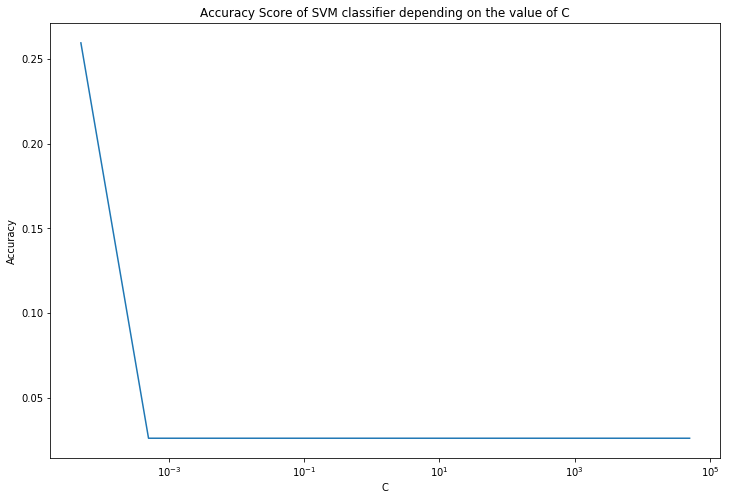

In [256]:
plt.figure(figsize=(12,8))
plt.plot(ind, pred)
plt.xscale('log')
plt.title('Accuracy Score of SVM classifier depending on the value of C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

In [197]:
pred

[0.2597402597402597,
 0.025974025974025983,
 0.025974025974025983,
 0.025974025974025983,
 0.025974025974025983,
 0.025974025974025983,
 0.025974025974025983,
 0.025974025974025983,
 0.025974025974025983,
 0.025974025974025983]

Le paramètre permet d'atteindre une précision de 97.5% lorsqu'il est augmenté, mais au delà d'un certain stade, la précision ne progresse plus.

### En ajoutant des variables de nuisances (par exemple 300 variables normales centrées réduites), augmentant ainsi le nombre de variables à nombre de points d’apprentissage fixé, montrez que la performance chute.

In [251]:
s = np.random.normal(0, 10, 300)

In [252]:
X.shape

(307, 1850)

In [253]:
X_blurred = []
for i in X :
    X_blurred.append(np.hstack((i, s)))

In [254]:
X_blurred = np.asarray(X_blurred)

In [255]:
X_blurred.shape

(307, 2150)

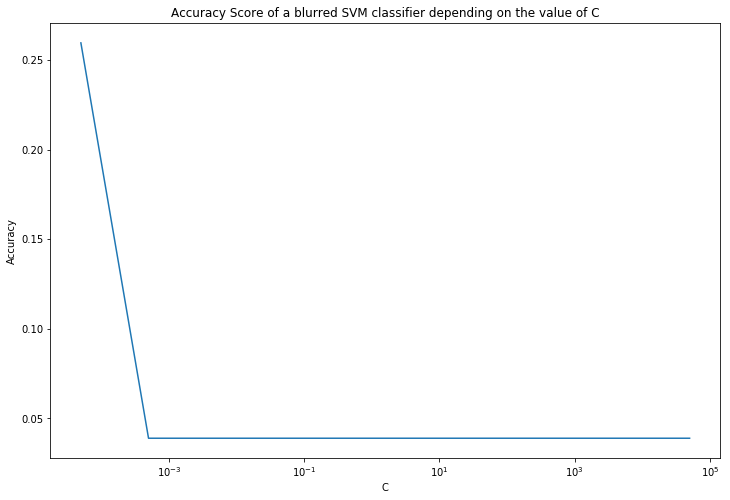

[0.2597402597402597, 0.038961038961038974, 0.038961038961038974, 0.038961038961038974, 0.038961038961038974, 0.038961038961038974, 0.038961038961038974, 0.038961038961038974, 0.038961038961038974, 0.038961038961038974]


In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.25)

i = 0.00005
pred = []
ind = []

while i < 50001 :
    clf = SVC(kernel = 'linear', C = i)
    clf.fit(X_train, y_train)
    err = 1 - accuracy_score(clf.predict(X_test), y_test)
    pred.append(err)
    ind.append(i)
    i = i * 10
    
plt.figure(figsize=(12,8))
plt.plot(ind, pred)
plt.xscale('log')
plt.title('Accuracy Score of a blurred SVM classifier depending on the value of C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

print(pred)

L'erreur est légèrement supérieure, à 3.9% au lieu de 2.5%.

### Vous pourrez améliorer la prédiction à l’aide d’une réduction de dimension basée sur l’objet sklearn.decomposition.PCA.

In [260]:
from sklearn.decomposition import PCA

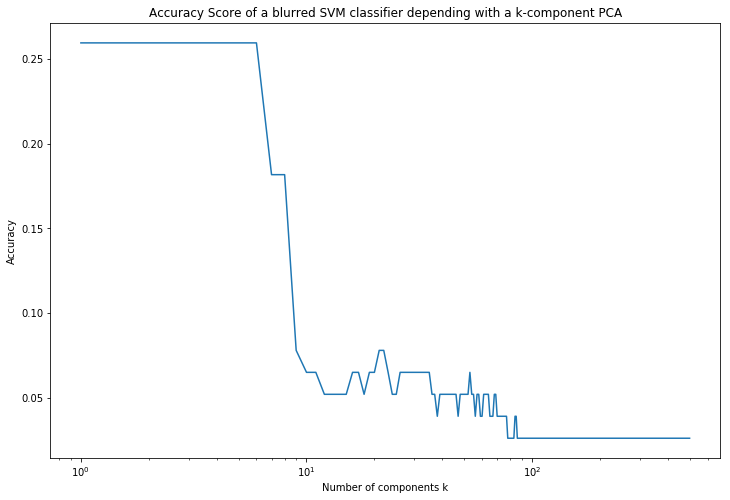

In [262]:
#Plot par rapport à la liste
pred = []
ind = []

for i in range(1,500):
    X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.25, random_state=42)
    pca = PCA(n_components=i)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    clf = SVC(kernel = 'linear', C = 0.0005)
    clf.fit(X_train, y_train)
    err = 1 - accuracy_score(clf.predict(X_test), y_test)
    pred.append(err)
    ind.append(i)
    i = i + 5

plt.figure(figsize=(12,8))
plt.plot(ind, pred)
plt.xscale('log')
plt.title('Accuracy Score of a blurred SVM classifier depending with a k-component PCA')
plt.xlabel('Number of components k')
plt.ylabel('Accuracy')
plt.show()

In [263]:
ind[pred.index(min(pred))]

78

In [264]:
min(pred)

0.025974025974025983

Avec 80 composants, la précision est similaire au cas sans ajout de variables.

### (Optionnel) Quel est l’effet du choix d’un noyau non-linéaire RBF sur la prédiction ?

#### Choix du Gamma

In [266]:
from sklearn.model_selection import validation_curve

param_range = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
train_scores, test_scores = validation_curve(
    SVC(kernel = 'rbf'), X, y_target, param_name="gamma", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)

In [268]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.25, random_state=42)

tuned_parameters = [{'gamma': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],'C': [1, 10, 50, 100, 250, 500, 750, 1000, 5000, 10000]}]

clf = GridSearchCV(SVC(kernel = 'rbf'), tuned_parameters, cv=5)
clf.fit(X_train, y_train)
y_true, y_pred = y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          1       0.97      0.98      0.97        57
          5       0.95      0.90      0.92        20

avg / total       0.96      0.96      0.96        77



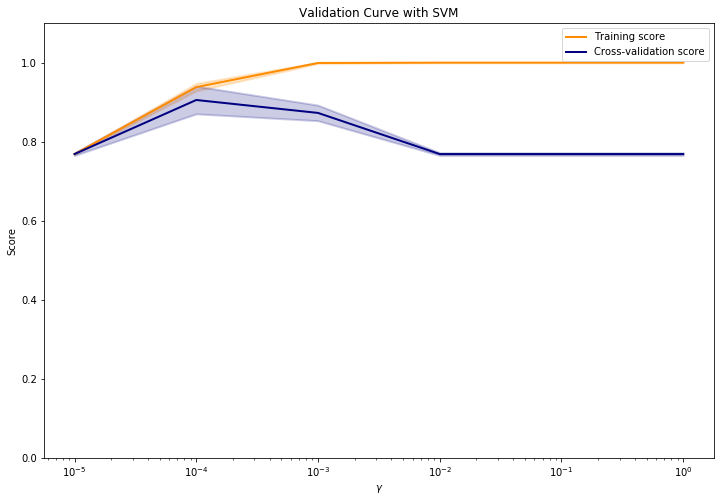

In [269]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12,8))
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

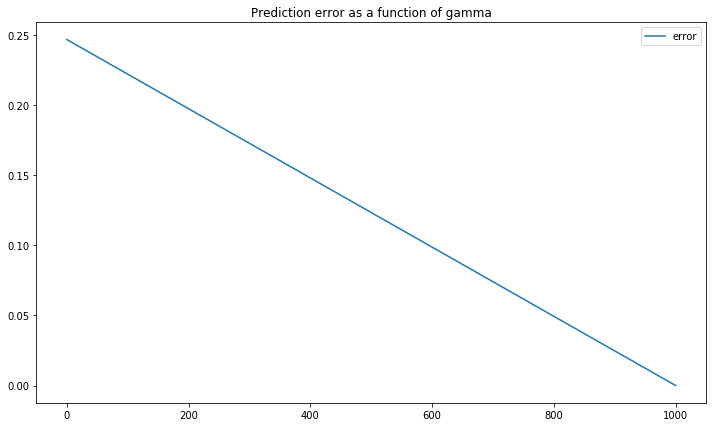

In [280]:
C = 10
gamma_list = [1e-10, 1000]
error = []
for g in gamma_list:
    clf = SVC(C = C, kernel='rbf', gamma = g)
    model = clf.fit(X, y_target)
    pred = model.predict(X_test)
    error.append(1 - accuracy_score(y_test, pred))
plt.figure(figsize=(12,7))
plt.plot(gamma_list, error, label = "error")
plt.title("Prediction error as a function of gamma")
plt.legend(loc = "best")
plt.show()

#### Choix de C

In [271]:
param_range = [1,10, 100, 1000, 10000]
train_scores, test_scores = validation_curve(
    SVC(kernel = 'rbf'), X, y_target, param_name="C", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)

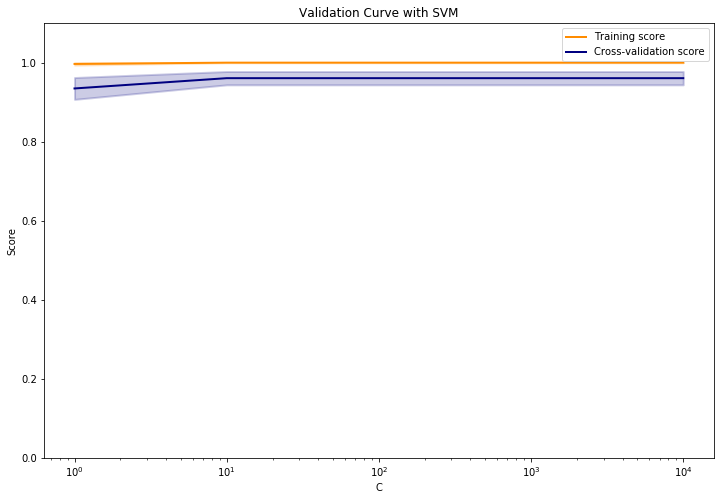

In [274]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(12,8))
plt.title("Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Il semble y avoir une valeur optimale de Gamma aux alentours de 10^-4 et une valeur de C autour de 10.

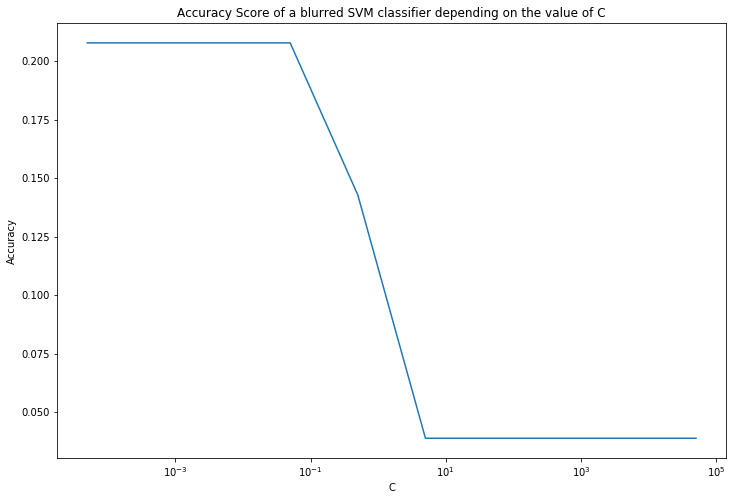

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y_target, test_size=0.25)

i = 0.00005
pred = []
ind = []

while i < 50001 :
    clf = SVC(kernel = 'rbf', C = i)
    clf.fit(X_train, y_train)
    err = 1 - accuracy_score(clf.predict(X_test), y_test)
    pred.append(err)
    ind.append(i)
    i = i * 10
    
plt.figure(figsize=(12,8))
plt.plot(ind, pred)
plt.xscale('log')
plt.title('Accuracy Score of a blurred SVM classifier depending on the value of C')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

In [283]:
print(pred)

[0.20779220779220775, 0.20779220779220775, 0.20779220779220775, 0.20779220779220775, 0.1428571428571429, 0.038961038961038974, 0.038961038961038974, 0.038961038961038974, 0.038961038961038974, 0.038961038961038974]


De manière générale, la précision est moindre dans ce cas-ci.

### Pour aller plus loin : Calcul du saut de dualité. L’exemple suivant : http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#example-svm-plot-separating-hyperplane-py explique comment accéder aux paramètres estimés par le modèle (vecteur de coefficients w dans l’attribut coef_, w0 attribut intercept, liste des vecteurs de supports, coefficients du problème dual).

En vous basant sur cet exemple écrivez un code qui va calculer la valeur des fonctionnelles primales
et duales et vérifiez que les valeurs sont proches. Comment varie la différence entre les deux valeurs
quand on fait varier la tolérance sur l’optimisation (paramètre tol de SVC) ? Vous afficherez la
différence des valeurs des fonctionnelles.

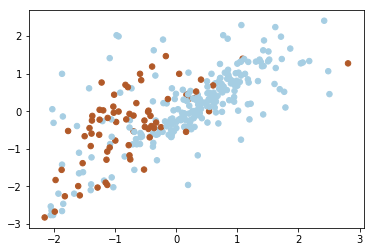

In [304]:
clf = SVC(kernel='linear', C=1000)
clf.fit(X, y_target)

plt.scatter(X[:, 2], X[:, 4], c=y_target, s=30, cmap=plt.cm.Paired)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


ValueError: X.shape[1] = 2 should be equal to 1850, the number of features at training time

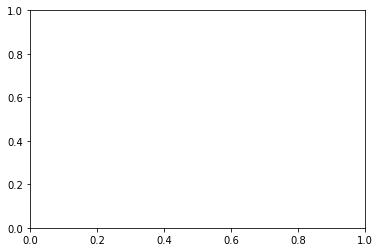

In [305]:
# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

print(ax)
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [211]:
clf.best_params_

{'C': 10, 'gamma': 0.0001}

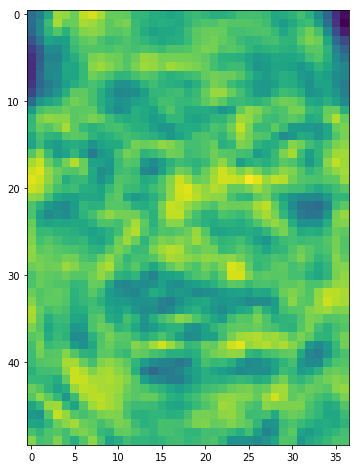

In [306]:
pl.figure(figsize=(8,8))
pl.imshow(np.reshape(clf.coef_, (h, w)))
pl.show()